In [87]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import matplotlib.pyplot as plt

In [76]:
DATA_DIR = 'Games-Sales.xlsx'
game_sales = pd.read_excel(DATA_DIR)
game_sales.head(10)

,Name,Sales,Series,Release,Genre,Developer,Publisher
0,PlayerUnknown's Battlegrounds,42.0,NaN,2017-12-01,Battle royale,PUBG Studios,Krafton
1,Minecraft,33.0,Minecraft,2011-11-01,"Sandbox, survival",Mojang Studios,Mojang Studios
2,Diablo III,20.0,Diablo,2012-05-01,Action role-playing,Blizzard Entertainment,Blizzard Entertainment
3,Garry's Mod,20.0,NaN,2006-11-01,Sandbox,Facepunch Studios,Valve
4,Terraria,17.2,NaN,2011-05-01,Action-adventure,Re-Logic,Re-Logic
5,World of Warcraft,14.0,Warcraft,2004-11-01,MMORPG,Blizzard Entertainment,Blizzard Entertainment
6,Half-Life 2,12.0,Half-Life,2004-11-01,First-person shooter,Valve,Valve (digital)
7,The Witcher 3: Wild Hunt,12.0,The Witcher,2015-05-01,Action role-playing,CD Projekt Red,CD Projekt
8,StarCraft,11.0,StarCraft,1998-03-01,Real-time strategy,Blizzard Entertainment,Blizzard Entertainment
9,The Sims,11.0,The Sims,2000-02-01,Life simulation,Maxis,Electronic Arts


In [77]:
game_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177 entries, 0 to 176
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Name       177 non-null    object        
 1   Sales      177 non-null    float64       
 2   Series     141 non-null    object        
 3   Release    177 non-null    datetime64[ns]
 4   Genre      177 non-null    object        
 5   Developer  177 non-null    object        
 6   Publisher  177 non-null    object        
dtypes: datetime64[ns](1), float64(1), object(5)
memory usage: 9.8+ KB


In [78]:
game_sales.isna().sum()

Name          0
Sales         0
Series       36
Release       0
Genre         0
Developer     0
Publisher     0
dtype: int64

In [79]:
game_sales[game_sales.isna().any(axis=1)]


,Name,Sales,Series,Release,Genre,Developer,Publisher
0,PlayerUnknown's Battlegrounds,42.0,NaN,2017-12-01,Battle royale,PUBG Studios,Krafton
3,Garry's Mod,20.0,NaN,2006-11-01,Sandbox,Facepunch Studios,Valve
4,Terraria,17.2,NaN,2011-05-01,Action-adventure,Re-Logic,Re-Logic
10,Fall Guys,10.0,NaN,2020-08-01,Battle royale,Mediatonic,Devolver Digital
13,Rust,9.0,NaN,2018-02-01,Survival,Facepunch Studios,Facepunch Studios
20,Valheim,6.0,NaN,2021-02-01,Survival,Iron Gate,Coffee Stain Publishing
23,Cities: Skylines,5.0,NaN,2015-03-01,City-building,Colossal Order,Paradox Interactive
26,The Forest,5.0,NaN,2018-04-01,Survival,Endnight Games,Endnight Games
27,Cyberpunk 2077,4.5,NaN,2020-12-01,Action role-playing,CD Projekt Red,CD Projekt
28,DayZ,4.0,NaN,2013-12-01,Survival,Bohemia Interactive,Bohemia Interactive


In [80]:
game_sales['Series'].fillna(game_sales['Name'], inplace=True)
game_sales.head(10)

C:\Program Files\KMSpico\temp\ipykernel_20348\526140150.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  game_sales['Series'].fillna(game_sales['Name'], inplace=True)


,Name,Sales,Series,Release,Genre,Developer,Publisher
0,PlayerUnknown's Battlegrounds,42.0,PlayerUnknown's Battlegrounds,2017-12-01,Battle royale,PUBG Studios,Krafton
1,Minecraft,33.0,Minecraft,2011-11-01,"Sandbox, survival",Mojang Studios,Mojang Studios
2,Diablo III,20.0,Diablo,2012-05-01,Action role-playing,Blizzard Entertainment,Blizzard Entertainment
3,Garry's Mod,20.0,Garry's Mod,2006-11-01,Sandbox,Facepunch Studios,Valve
4,Terraria,17.2,Terraria,2011-05-01,Action-adventure,Re-Logic,Re-Logic
5,World of Warcraft,14.0,Warcraft,2004-11-01,MMORPG,Blizzard Entertainment,Blizzard Entertainment
6,Half-Life 2,12.0,Half-Life,2004-11-01,First-person shooter,Valve,Valve (digital)
7,The Witcher 3: Wild Hunt,12.0,The Witcher,2015-05-01,Action role-playing,CD Projekt Red,CD Projekt
8,StarCraft,11.0,StarCraft,1998-03-01,Real-time strategy,Blizzard Entertainment,Blizzard Entertainment
9,The Sims,11.0,The Sims,2000-02-01,Life simulation,Maxis,Electronic Arts


In [81]:
game_sales.isna().sum()

Name         0
Sales        0
Series       0
Release      0
Genre        0
Developer    0
Publisher    0
dtype: int64

##### smart question (specific) 
1. Game manakah yang paling laku terjual
2. Publisher manakah yang paling banyak merilis game
3. Developer manakah yang paling banyak membuat game
4. Game yang paling terlama dan terbaru rilis di dalam data ini

In [82]:
game_sales_max_sales = game_sales[game_sales['Sales'] == game_sales['Sales'].max()]
game_sales_max_sales['Name']

0    PlayerUnknown's Battlegrounds
Name: Name, dtype: object

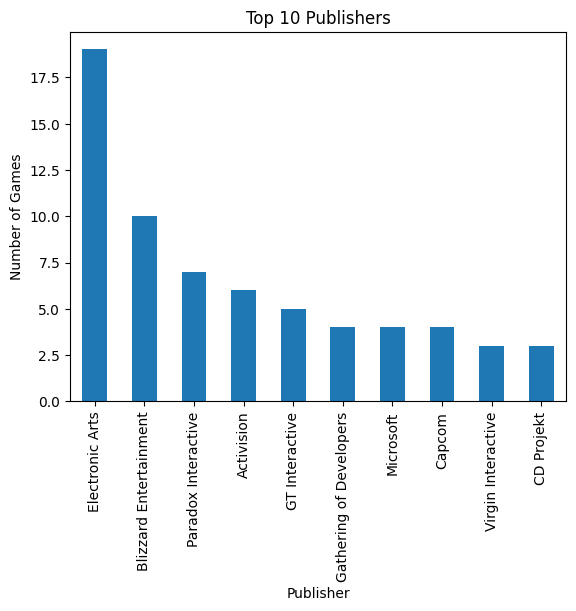

In [91]:
game_sales['Publisher'].value_counts().head(10).plot(kind='bar')
plt.title('Top 10 Publishers')
plt.xlabel('Publisher')
plt.ylabel('Number of Games')
plt.show()



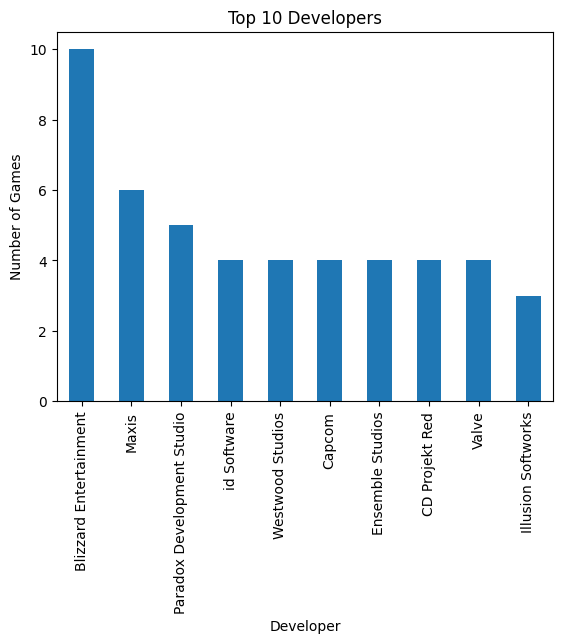

In [92]:
game_sales['Developer'].value_counts().head(10).plot(kind='bar')
plt.title('Top 10 Developers')
plt.xlabel('Developer')
plt.ylabel('Number of Games')
plt.show()

In [169]:
game_realease_new = pd.to_datetime(game_sales['Release'])
game_sales_new = game_sales['Release'].max()
game_sales_new = game_sales[game_sales['Release'] == game_sales_new][['Name', 'Release', 'Sales']]
print('Game with the most recent release date (in dataset):')
print(game_sales_new)
print('\n')
game_realease_old = pd.to_datetime(game_sales['Release'])
game_sales_old = game_sales['Release'].min()
game_sales_old = game_sales[game_sales['Release'] == game_sales_old][['Name', 'Release', 'Sales']]
print('Game with the most oldest release date (in dataset):')
print(game_sales_old)


Game with the most recent release date (in dataset):
       Name    Release  Sales
20  Valheim 2021-02-01    6.0


Game with the most oldest release date (in dataset):
        Name    Release  Sales
133  Hydlide 1984-12-01    1.0


##### smart question (measurable) 
1. Berapa banyak penjualan game terbanyak
2. Berapa banyak game yang dirilis oleh publisher terbanyak
3. Berapa banyak game yang dibuat oleh developer terbanyak
4. Berapa banyak game yang dirilis setiap tahunnya
5. Series game manakah yang paling banyak penjualannya
6. Genre game manakah yang paling banyak dibuat
7. Genre game manakah yang paling banyak penjualannya

In [98]:
game_sales_max_sales = game_sales[game_sales['Sales'] == game_sales['Sales'].max()]
game_sales_max_sales[['Name', 'Sales']]

,Name,Sales
0,PlayerUnknown's Battlegrounds,42.0


In [133]:
game_publisher_max_published =  game_sales['Publisher'].groupby(game_sales['Publisher']).count().sort_values(ascending=False).head(1)
print(game_publisher_max_published)

game_max_name = game_sales[game_sales['Publisher'] == 'Electronic Arts']
game_max_name[['Name', 'Developer', 'Series', 'Genre', 'Release', 'Sales', 'Publisher']].sort_values('Sales', ascending=False)


Publisher
Electronic Arts    19
Name: Publisher, dtype: int64


,Name,Developer,Series,Genre,Release,Sales,Publisher
9,The Sims,Maxis,The Sims,Life simulation,2000-02-01,11.0,Electronic Arts
15,The Sims 3,Maxis,The Sims,Life simulation,2009-06-01,7.0,Electronic Arts
19,The Sims 2,Maxis,The Sims,Life simulation,2004-09-01,6.0,Electronic Arts
25,SimCity 3000,Maxis,SimCity,City-building,1999-01-01,5.0,Electronic Arts
30,Populous,Bullfrog Productions,Populous,God game,1989-06-01,4.0,Electronic Arts
41,Crysis,Crytek,Crysis,First-person shooter,2007-11-01,3.0,Electronic Arts
44,Theme Park,Bullfrog Productions,Theme Park,Construction and management simulation,2005-06-01,3.0,Electronic Arts
76,SimCity,Electronic Arts,SimCity,City-building,2013-03-01,2.0,Electronic Arts
79,Spore,Maxis,Spore,God game,2008-09-01,2.0,Electronic Arts
60,Battlefield 1942,EA DICE,Battlefield,First-person shooter,2002-09-01,2.0,Electronic Arts
